# Main Notes

.pivot_table('index', 'aggfunc')  - creates a spreadsheet-style pivot table as a dataframe

'size' keyword counts all rows in a group

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\jgribbl1\OneDrive - Burlington\Documents\Python\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# let's get a count of the job titles
df.pivot_table(index = 'job_title_short', aggfunc = 'size')
# 'size' counts all rows in a group

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
# now let's find the median salary by job
df.pivot_table(values = 'salary_year_avg', index = 'job_title_short', aggfunc = 'median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [5]:
# now let's find the median salary by country
df.pivot_table(values = 'salary_year_avg', index = 'job_title_short', columns = 'job_country', aggfunc = 'median')

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


In [6]:
# or you can switch job_country to the rows and job_title_short to the columns
df.pivot_table(values = 'salary_year_avg', index = 'job_country', columns = 'job_title_short', aggfunc = 'median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [ ]:
# now let's find the median salaries of the three most common job_title_shorts in the countries with the most postings
# first find what those top countries are
# use .value_counts for the job_countries (top 6) and only do their indexes (country names)
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [13]:
# now let's turn this into a pivot table
df_job_country_salary = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'median'
)

# now use the .loc() method to run the df_job_country_salary on the 'top_countries'
df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# now make the df_job_country_salary columns filtered to only the above three job titles (list of 'job_titles')
df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary

job_title_short,Data Scientist,Data Engineer,Data Analyst
job_country,,,
United States,130000.0,125000.0,90000.0
India,114008.0,147500.0,100500.0
United Kingdom,105300.0,110000.0,87750.0
France,88128.0,98301.5,69175.0
Germany,131560.0,147500.0,103750.0
Spain,88128.0,133000.0,91977.0


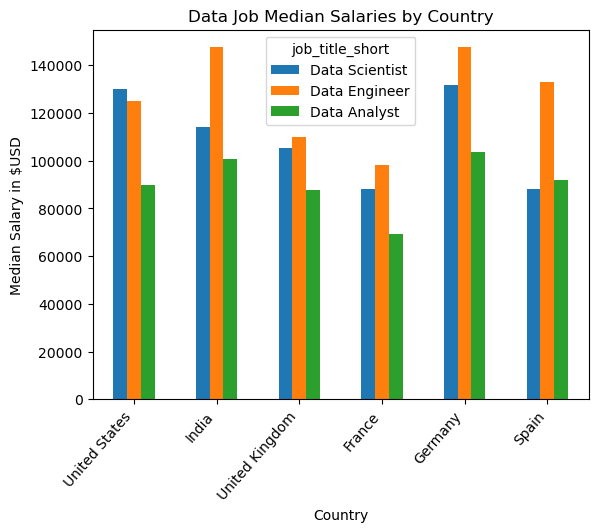

In [17]:
# now just plot these results 
df_job_country_salary.plot(kind = 'bar')
plt.title('Data Job Median Salaries by Country')
plt.ylabel('Median Salary in $USD')
plt.xlabel('Country')
plt.xticks(rotation = 49, ha = 'right')
plt.show()

# Practice Problem 1

Create a pivot table to count the number of job postings for each job_title_short and job_country. Display the first 10 rows of the resulting pivot table

In [20]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# include both job_title_short and job_country as indexes (include them in a list)
# use 'size' to count all the rows 
df.pivot_table(index = ['job_title_short', 'job_country'], aggfunc = 'size').head(10)

job_title_short   job_country
Business Analyst  Afghanistan      4
                  Albania         11
                  Algeria         21
                  Angola           1
                  Argentina      453
                  Armenia         29
                  Australia      928
                  Austria        738
                  Azerbaijan      16
                  Bahamas          5
dtype: int64

# Practice Problem 2

Create a pivot table to find the maximum, minimum, and average salary_year_avg for each company_name. Display the first 5 rows of the resulting pivot table

In [21]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.pivot_table(values = 'salary_year_avg', index = 'company_name', aggfunc = ['max', 'min', 'mean']).head(5)

,max,min,mean
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,120000.000000,61000.000000,77750.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


# Practice Problem 3

Create a pivot table to calculate the median of salary_year_avg for each company_name and job_country:

Filter the pivot table to only include 'Data Scientist' roles

Then filter the pivot table to only include company_name with a median salary_year_avg greater than 200,000

Display the first 10 rows of the resulting pivot table

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# create the data science dataframe from the original dataframe filtered to just data science jobs
df_ds = df[df['job_title_short'] == 'Data Scientist'].copy()

# make the final dataframe equal to the data science dataframe
df_filtered = df_ds.pivot_table(
    values = 'salary_year_avg',
    index = ['company_name', 'job_country'],
    aggfunc = 'median'
)
# make the final dataframe equal to the final dataframe filtered to only show salaries greater than $200000/year (and only show the first ten results)
df_filtered = df_filtered[df_filtered['salary_year_avg'] > 200000].head(10)
df_filtered

salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0